In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans


In [35]:
# Load the dataset
# The 'encoding' parameter is set to 'unicode_escape' to handle any special characters in the dataset.
df = pd.read_csv('sales_data_sample.csv', encoding='unicode_escape')

print(df.head())


   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [9]:
#Check for null values
df.isnull().sum()


ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [36]:
# Drop unnecessary columns from the DataFrame 
# These columns are not needed for clustering analysis
df.drop(
    [
        "ORDERNUMBER",       # Order identifier
        "PRICEEACH",        # Price per item (not needed for clustering)
        "ORDERDATE",        # Date of the order (not needed for clustering)
        "PHONE",            # Customer's phone number (not relevant for clustering)
        "ADDRESSLINE1",     # First line of the address (not relevant for clustering)
        "ADDRESSLINE2",     # Second line of the address (not relevant for clustering)
        "CITY",             # City of the customer (not relevant for clustering)
        "STATE",            # State of the customer (not relevant for clustering)
        "TERRITORY",        # Sales territory (not relevant for clustering)
        "POSTALCODE",       # Postal code (not relevant for clustering)
        "CONTACTLASTNAME",  # Last name of the contact person (not relevant for clustering)
        "CONTACTFIRSTNAME"  # First name of the contact person (not relevant for clustering)
    ], 
    axis=1,                # Specify that we are dropping columns (axis=1)
    inplace=True           # Modify the DataFrame in place without creating a copy
)


In [11]:
df.isnull().sum()


QUANTITYORDERED    0
ORDERLINENUMBER    0
SALES              0
STATUS             0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
PRODUCTCODE        0
CUSTOMERNAME       0
COUNTRY            0
DEALSIZE           0
dtype: int64

<Axes: xlabel='STATUS', ylabel='count'>

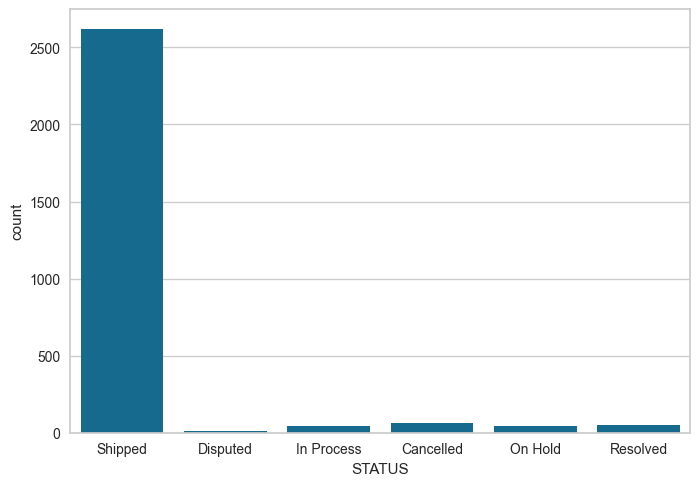

In [39]:

# Create a count plot to visualize the distribution of different statuses in the dataset
# 'STATUS' is the categorical variable for which we want to see the counts
sns.countplot(data=df, x='STATUS')


<Axes: xlabel='SALES', ylabel='Count'>

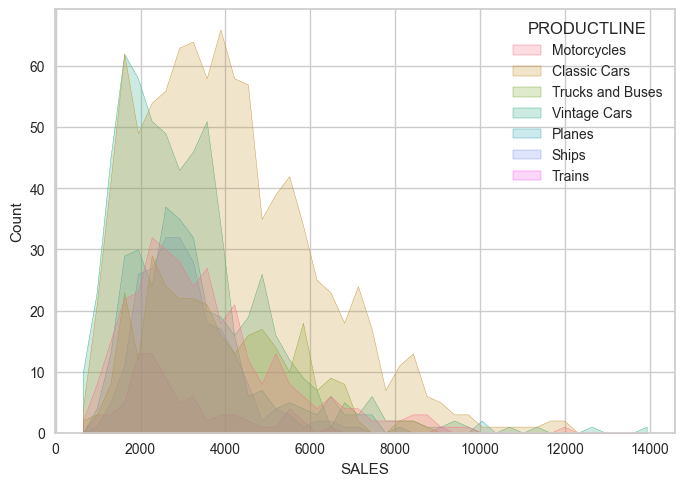

In [40]:
# Create a histogram to visualize the distribution of sales amounts
# 'SALES' is the numeric variable we want to analyze
# 'PRODUCTLINE' is used to differentiate the sales by product line using different colors
sns.histplot(
    x='SALES',                # The x-axis will represent the sales amounts
    hue='PRODUCTLINE',        # The hue parameter allows for color-coding the data points based on the 'PRODUCTLINE' column
    data=df,                 # 'df' is the DataFrame containing the data
    element="poly"           # The element parameter specifies that the histogram bars should be drawn as polygons (filled shapes)
)

In [14]:
# Here we can see all the catagory lies in the range of price and hence 
## in this we be creating a cluster on targeting the same


In [41]:
df['PRODUCTLINE'].unique()
# Display the unique values in the 'PRODUCTLINE' column

array(['Motorcycles', 'Classic Cars', 'Trucks and Buses', 'Vintage Cars',
       'Planes', 'Ships', 'Trains'], dtype=object)

In [42]:
# Remove duplicate rows from the DataFrame 'df'
df.drop_duplicates(inplace=True)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   QUANTITYORDERED  2823 non-null   int64  
 1   ORDERLINENUMBER  2823 non-null   int64  
 2   SALES            2823 non-null   float64
 3   STATUS           2823 non-null   object 
 4   QTR_ID           2823 non-null   int64  
 5   MONTH_ID         2823 non-null   int64  
 6   YEAR_ID          2823 non-null   int64  
 7   PRODUCTLINE      2823 non-null   object 
 8   MSRP             2823 non-null   int64  
 9   PRODUCTCODE      2823 non-null   object 
 10  CUSTOMERNAME     2823 non-null   object 
 11  COUNTRY          2823 non-null   object 
 12  DEALSIZE         2823 non-null   object 
dtypes: float64(1), int64(6), object(6)
memory usage: 286.8+ KB


In [43]:
# Select columns of type 'object' (categorical data) from the DataFrame 'df'
# The select_dtypes method is used to filter the DataFrame based on the data type
# 'object' indicates columns that contain text or categorical values.
# The resulting columns are converted to a list and stored in the variable 'list_cat'.
list_cat = df.select_dtypes(include=['object']).columns.tolist()


In [19]:
list_cat


['STATUS', 'PRODUCTLINE', 'PRODUCTCODE', 'CUSTOMERNAME', 'COUNTRY', 'DEALSIZE']

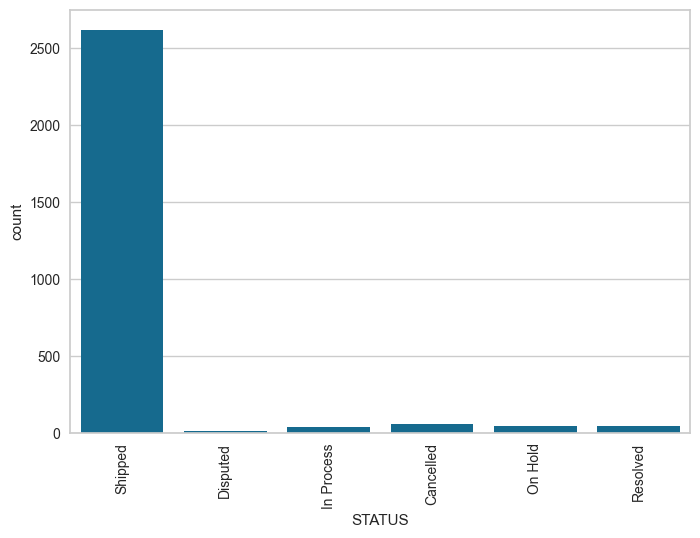

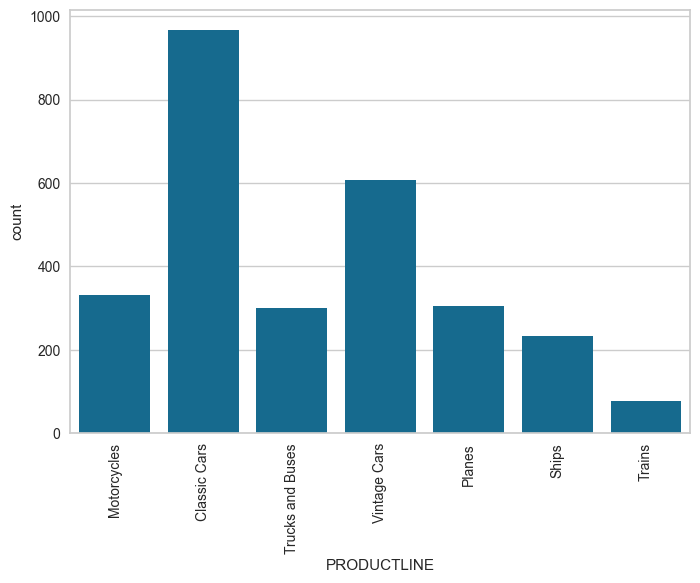

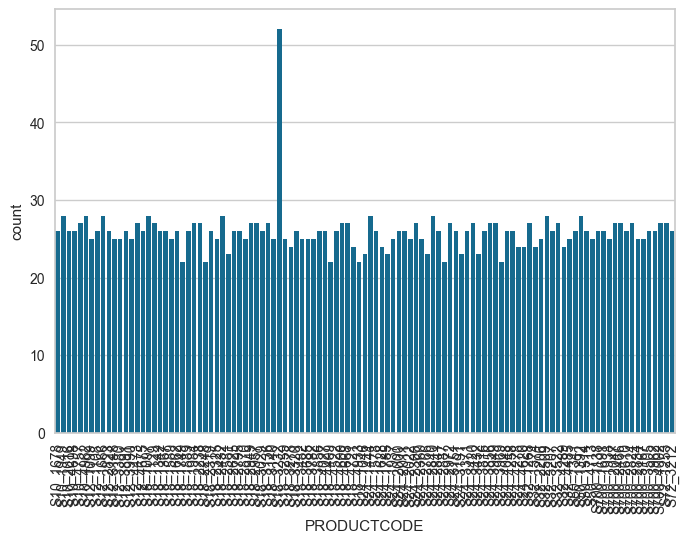

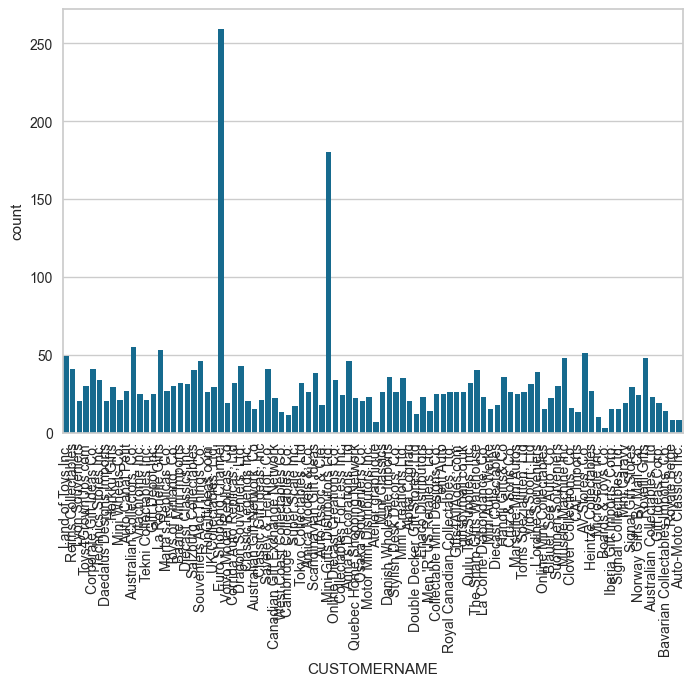

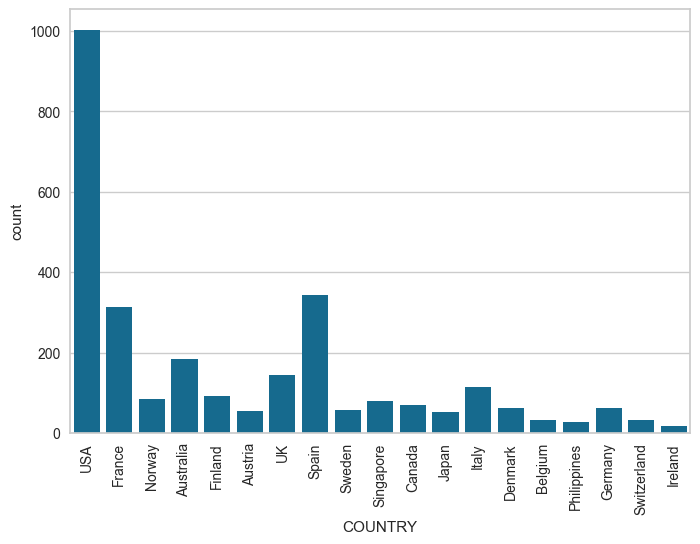

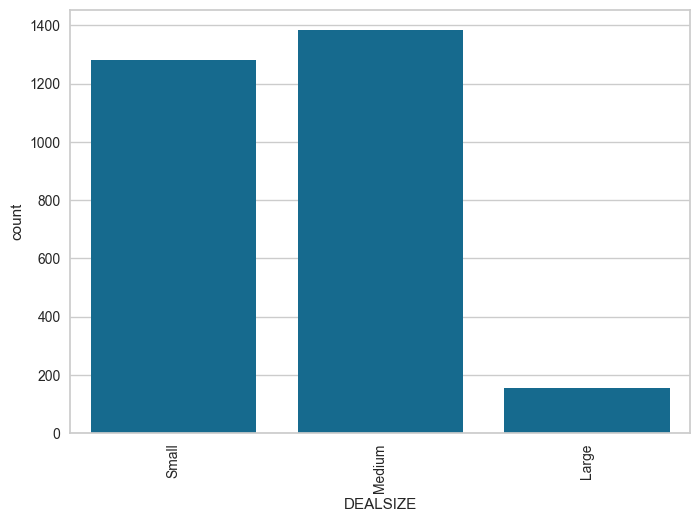

In [44]:
# Iterate over each column name in the list of categorical columns
for i in list_cat:
    # Create a count plot for the current categorical column 'i'
    # This visualizes the count of occurrences for each category within the column
    sns.countplot(data=df, x=i)

    # Rotate the x-axis tick labels by 90 degrees for better readability
    plt.xticks(rotation=90)

    # Display the plot
    plt.show()


In [45]:
# Import the LabelEncoder from sklearn preprocessing module
from sklearn import preprocessing

# Create an instance of the LabelEncoder
le = preprocessing.LabelEncoder()

# Loop through each categorical column in the list of categorical columns
for i in list_cat:
    # Apply label encoding to the current categorical column 'i'
    # This converts the categorical labels into numeric format, which is suitable for machine learning models
    df[i] = le.fit_transform(df[i])


In [46]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   QUANTITYORDERED  2823 non-null   int64  
 1   ORDERLINENUMBER  2823 non-null   int64  
 2   SALES            2823 non-null   float64
 3   STATUS           2823 non-null   int64  
 4   QTR_ID           2823 non-null   int64  
 5   MONTH_ID         2823 non-null   int64  
 6   YEAR_ID          2823 non-null   int64  
 7   PRODUCTLINE      2823 non-null   int64  
 8   MSRP             2823 non-null   int64  
 9   PRODUCTCODE      2823 non-null   int64  
 10  CUSTOMERNAME     2823 non-null   int64  
 11  COUNTRY          2823 non-null   int64  
 12  DEALSIZE         2823 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 286.8 KB


In [47]:
# Convert the 'SALES' column to integer type
# This ensures that the values in 'SALES' are treated as integers,
df['SALES'] = df['SALES'].astype(int)


In [48]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   QUANTITYORDERED  2823 non-null   int64
 1   ORDERLINENUMBER  2823 non-null   int64
 2   SALES            2823 non-null   int64
 3   STATUS           2823 non-null   int64
 4   QTR_ID           2823 non-null   int64
 5   MONTH_ID         2823 non-null   int64
 6   YEAR_ID          2823 non-null   int64
 7   PRODUCTLINE      2823 non-null   int64
 8   MSRP             2823 non-null   int64
 9   PRODUCTCODE      2823 non-null   int64
 10  CUSTOMERNAME     2823 non-null   int64
 11  COUNTRY          2823 non-null   int64
 12  DEALSIZE         2823 non-null   int64
dtypes: int64(13)
memory usage: 286.8 KB


In [49]:
# Define the target features for the analysis
# 'SALES' will be used as the target variable indicating the sales amount,
# while 'PRODUCTCODE' will be included as a feature to predict the sales.
X = df[['SALES', 'PRODUCTCODE']]


In [50]:
df.columns

Index(['QUANTITYORDERED', 'ORDERLINENUMBER', 'SALES', 'STATUS', 'QTR_ID',
       'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE', 'MSRP', 'PRODUCTCODE',
       'CUSTOMERNAME', 'COUNTRY', 'DEALSIZE'],
      dtype='object')

In [51]:
# K Means implementation

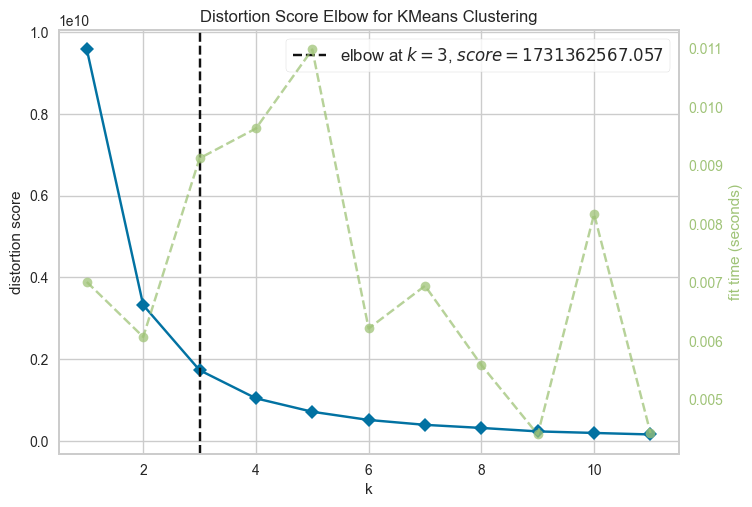

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [52]:
# Import the KElbowVisualizer from the Yellowbrick library to help determine the optimal number of clusters
from yellowbrick.cluster import KElbowVisualizer

# Initialize the KMeans clustering model
model = KMeans()

# Create an instance of the KElbowVisualizer
# This visualizer will help to identify the optimal number of clusters (k) to use
# We will test k values ranging from 1 to 12
visualizer = KElbowVisualizer(model, k=(1, 12)).fit(X)

# Display the elbow curve to visually assess the optimal number of clusters
visualizer.show()


In [55]:
 # Hence the NUmber of Clusters to be choosen Will be 4 according to the elbow method


In [56]:
# Initialize the KMeans clustering algorithm
# n_clusters: Number of clusters to form, set to 4 based on previous analysis (e.g., elbow method)
# init: Method for initialization, 'k-means++' helps to select initial cluster centers in a smart way to speed up convergence
# random_state: Seed used by the random number generator for reproducibility; 
#setting it to 0 ensures that results are consistent across runs
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(X)

# The fit method applies the KMeans algorithm to the dataset X, finding 4 clusters based on the provided features


In [57]:
# Import the Counter class from the collections module
from collections import Counter

# Use Counter to count the number of occurrences of each label (cluster) in the kmeans.labels_ array
# kmeans.labels_ contains the cluster assignments for each data point in the dataset
cluster_sizes = Counter(kmeans.labels_)

# Output the sizes of each cluster
print(cluster_sizes)


Counter({np.int32(0): 1078, np.int32(2): 1015, np.int32(3): 537, np.int32(1): 193})


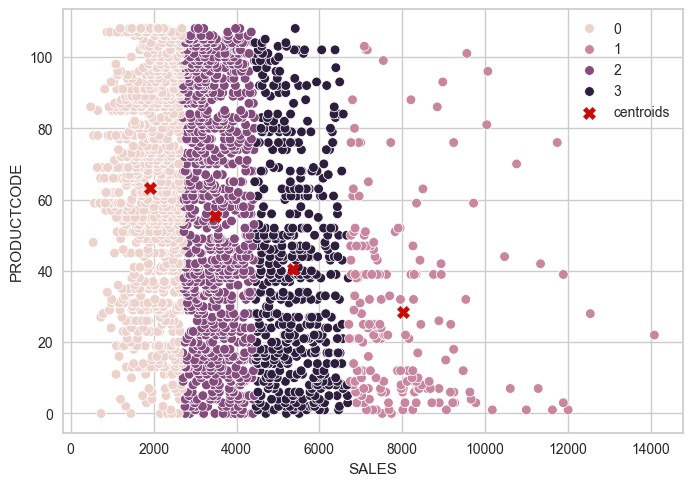

In [58]:


# Create a scatter plot of the data points with SALES on the x-axis and PRODUCTCODE on the y-axis
# Color the points by their assigned cluster labels from kmeans
sns.scatterplot(data=X, x="SALES", y="PRODUCTCODE", hue=kmeans.labels_)

# Overlay the cluster centroids on the scatter plot
# kmeans.cluster_centers_ contains the coordinates of the centroids of each cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            marker="X", c="r", s=80, label="centroids")  # Use a red "X" marker for centroids

# Add a legend to the plot to distinguish between clusters and centroids
plt.legend()

# Display the plot
plt.show()
